In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [418]:
df = pd.read_csv(r'D:\Codes\Python\MyProject\Mental Health Data\train.csv')

In [419]:
df.shape

(140700, 20)

In [420]:
df.sample(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
114485,114485,Anushka,Female,19.0,Bhopal,Student,NaN,5.0,NaN,8.58,4.0,NaN,More than 8 hours,Healthy,Class 12,Yes,10.0,2.0,Yes,1
87104,87104,Gagan,Male,56.0,Chennai,Working Professional,Pilot,NaN,5.0,NaN,NaN,5.0,5-6 hours,Moderate,BSc,No,3.0,4.0,Yes,0
64163,64163,Nandini,Female,51.0,Jaipur,Working Professional,Doctor,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,B.Pharm,Yes,10.0,1.0,Yes,0
97225,97225,Jai,Male,30.0,Jaipur,Working Professional,Teacher,NaN,1.0,NaN,NaN,4.0,5-6 hours,Moderate,B.Arch,Yes,6.0,4.0,No,0
54477,54477,Damini,Female,59.0,Bangalore,Working Professional,Consultant,NaN,5.0,NaN,NaN,4.0,7-8 hours,Healthy,BSc,No,5.0,1.0,Yes,0


In [421]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [422]:
(df.isnull().sum()/df.shape[0])*100

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [423]:
df = df.drop(['id','Name','Academic Pressure','CGPA','Study Satisfaction'],axis=1)

In [424]:
(df.isnull().sum()/df.shape[0])*100

Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Work Pressure                            19.842217
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  object 
 3   Working Professional or Student        140700 non-null  object 
 4   Profession                             104070 non-null  object 
 5   Work Pressure                          112782 non-null  float64
 6   Job Satisfaction                       112790 non-null  float64
 7   Sleep Duration                         140700 non-null  object 
 8   Dietary Habits                         140696 non-null  object 
 9   Degree                                 140698 non-null  object 
 10  Have you ever had suicidal thoughts ?  140700 non-null  

In [426]:
for col in df.select_dtypes(include='object').columns.to_list():
    print(f'{col}->{df[col].nunique()}')

Gender->2
City->98
Working Professional or Student->2
Profession->64
Sleep Duration->36
Dietary Habits->23
Degree->115
Have you ever had suicidal thoughts ?->2
Family History of Mental Illness->2


<Axes: >

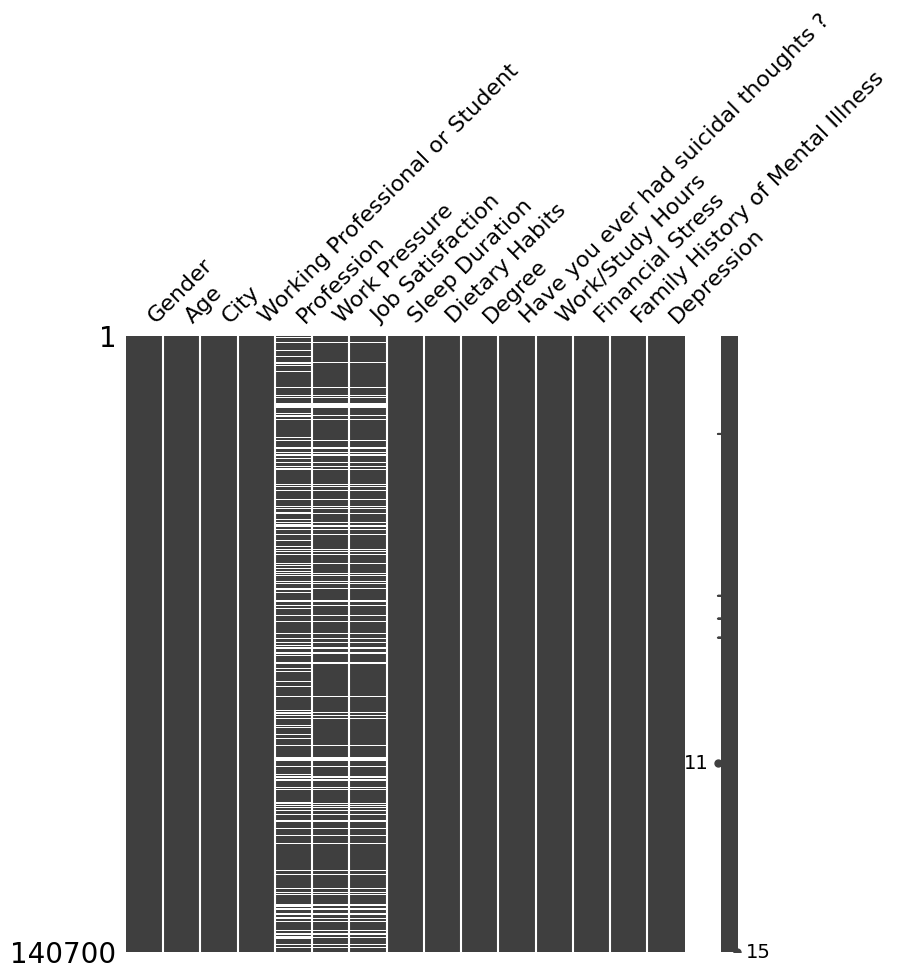

In [427]:
msno.matrix(df, figsize=(8, 8))

<Axes: >

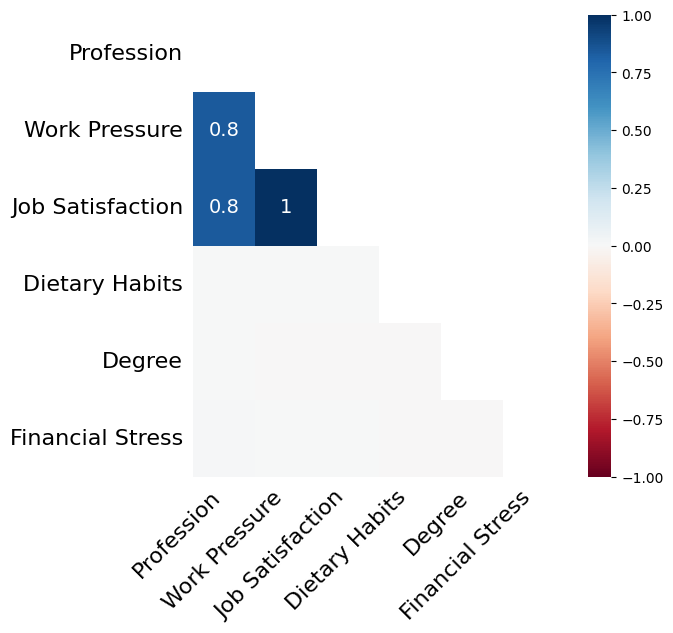

In [428]:
msno.heatmap(df,figsize=(6,6))

In [429]:
label = LabelEncoder()
df['Profession_no'] = label.fit_transform(df['Profession'])
label_classes_dict = {index: class_label for index, class_label in enumerate(label.classes_)}

In [430]:
label_classes_dict

{0: 'Academic',
 1: 'Accountant',
 2: 'Analyst',
 3: 'Architect',
 4: 'B.Com',
 5: 'B.Ed',
 6: 'BBA',
 7: 'BCA',
 8: 'BE',
 9: 'Business Analyst',
 10: 'Chef',
 11: 'Chemist',
 12: 'City Manager',
 13: 'Civil Engineer',
 14: 'Consultant',
 15: 'Content Writer',
 16: 'Customer Support',
 17: 'Data Scientist',
 18: 'Dev',
 19: 'Digital Marketer',
 20: 'Doctor',
 21: 'Educational Consultant',
 22: 'Electrician',
 23: 'Entrepreneur',
 24: 'Family Consultant',
 25: 'FamilyVirar',
 26: 'Finanancial Analyst',
 27: 'Financial Analyst',
 28: 'Graphic Designer',
 29: 'HR Manager',
 30: 'Investment Banker',
 31: 'Judge',
 32: 'LLM',
 33: 'Lawyer',
 34: 'M.Ed',
 35: 'MBA',
 36: 'MBBS',
 37: 'Manager',
 38: 'Marketing Manager',
 39: 'Mechanical Engineer',
 40: 'Medical Doctor',
 41: 'Moderate',
 42: 'Nagpur',
 43: 'Patna',
 44: 'PhD',
 45: 'Pharmacist',
 46: 'Pilot',
 47: 'Plumber',
 48: 'Pranav',
 49: 'Profession',
 50: 'Research Analyst',
 51: 'Researcher',
 52: 'Sales Executive',
 53: 'Software 

In [431]:
df['Profession_no'] = df['Profession_no'].map(lambda x: np.nan if x == 64 else x)

In [432]:
columns_to_impute = ['Profession_no', 'Work Pressure', 'Job Satisfaction']
data_subset = df[columns_to_impute]
lr = RandomForestClassifier(random_state=0,n_estimators=50)
mice_imputer = IterativeImputer(estimator=lr, max_iter=10, random_state=0, initial_strategy='most_frequent')
imputed_data = mice_imputer.fit_transform(data_subset)
data_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute)
df[columns_to_impute] = data_imputed

In [434]:
df['Profession_no'] = np.round(df['Profession_no']).astype(int)
df['Profession_no'] = label.inverse_transform(df['Profession_no'])

In [444]:
df = df.dropna(subset=['Dietary Habits', 'Degree', 'Financial Stress'], axis=0)

In [446]:
df.drop('Profession',axis=1,inplace=True)

In [451]:
df.rename({'Profession_no':'Profession'},axis=1,inplace=True)

In [452]:
(df.isnull().sum()/df.shape[0])*100

Gender                                   0.0
Age                                      0.0
City                                     0.0
Working Professional or Student          0.0
Work Pressure                            0.0
Job Satisfaction                         0.0
Sleep Duration                           0.0
Dietary Habits                           0.0
Degree                                   0.0
Have you ever had suicidal thoughts ?    0.0
Work/Study Hours                         0.0
Financial Stress                         0.0
Family History of Mental Illness         0.0
Depression                               0.0
Profession                               0.0
dtype: float64

In [457]:
df.sample(5)

,Gender,Age,City,Working Professional or Student,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Profession
3642,Female,55.0,Chennai,Working Professional,5.0,5.0,7-8 hours,Unhealthy,LLB,No,9.0,3.0,No,0,Lawyer
57220,Male,56.0,Nashik,Working Professional,1.0,2.0,7-8 hours,Healthy,BCA,Yes,3.0,1.0,No,0,Data Scientist
84007,Female,29.0,Bhopal,Student,5.0,1.0,7-8 hours,Moderate,MSc,Yes,4.0,1.0,No,0,Teacher
138426,Female,54.0,Chennai,Working Professional,2.0,4.0,5-6 hours,Moderate,Class 12,Yes,2.0,2.0,Yes,0,Teacher
123210,Female,34.0,Kalyan,Working Professional,1.0,2.0,5-6 hours,Healthy,B.Ed,No,1.0,3.0,Yes,0,Teacher


### EDA

<Axes: xlabel='Depression', ylabel='proportion'>

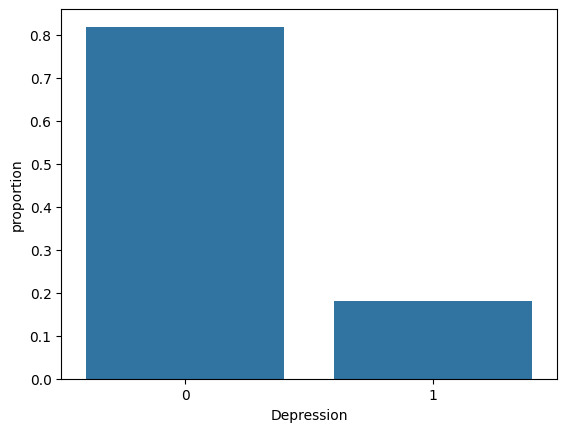

In [460]:
sns.countplot(data=df,x='Depression',stat='proportion')

<Axes: xlabel='Gender', ylabel='count'>

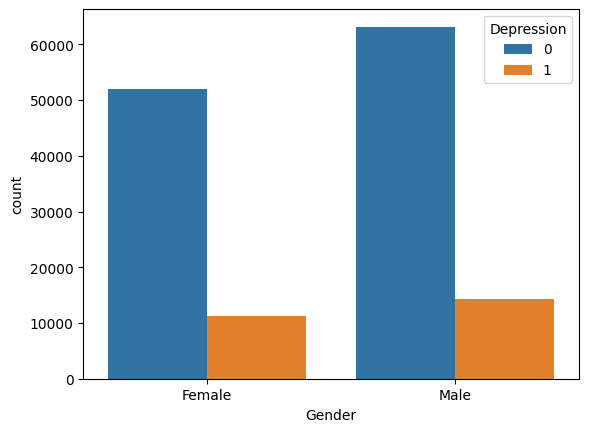

In [459]:
sns.countplot(data=df,x='Gender',hue='Depression')

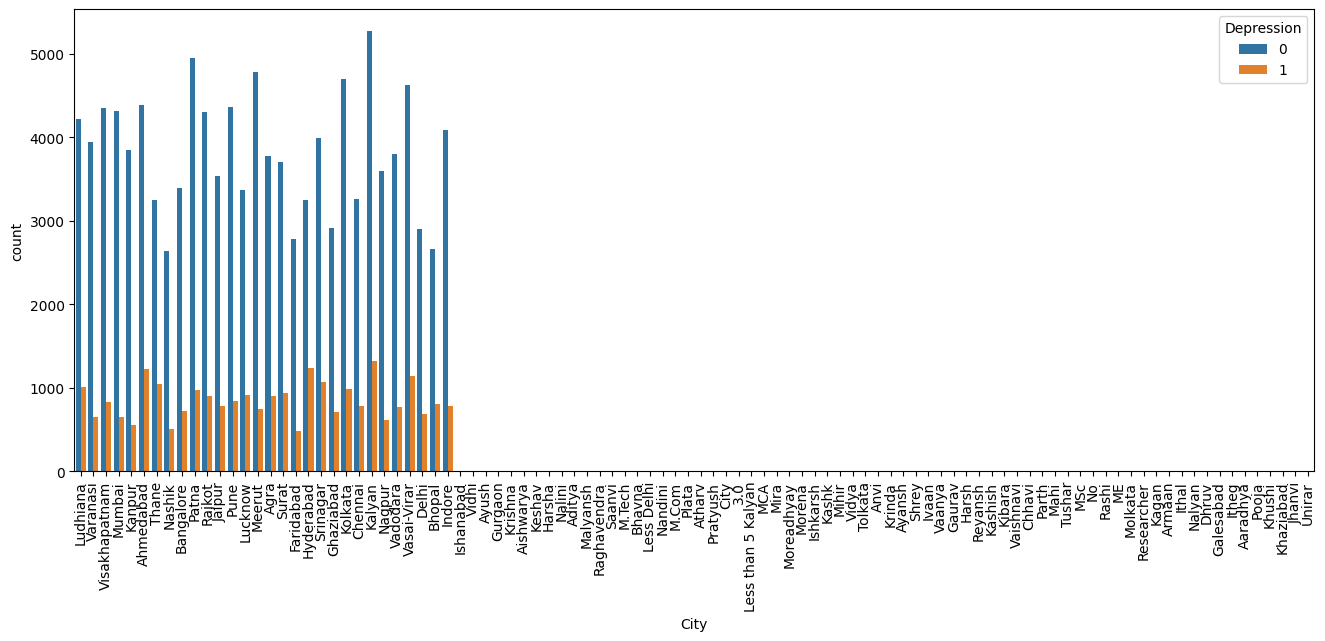

In [482]:
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='City',hue='Depression')
plt.xticks(rotation=90);

In [495]:
(df['City'] == 'Kolkata').sum()

5688

In [505]:
city = df['City'].value_counts()[df['City'].value_counts()>100].index.to_list()

In [506]:
df['City'] = df['City'].apply(lambda x: x if x in city else 'Others')

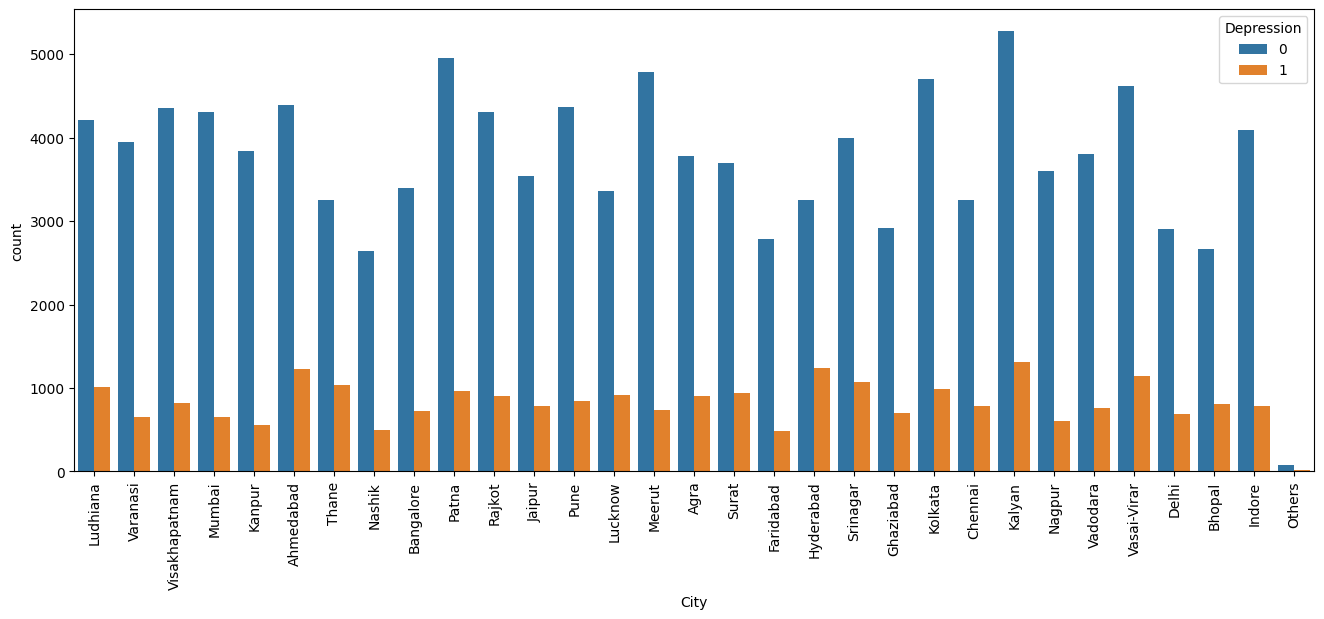

In [507]:
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='City',hue='Depression')
plt.xticks(rotation=90);

<Axes: xlabel='Working Professional or Student', ylabel='count'>

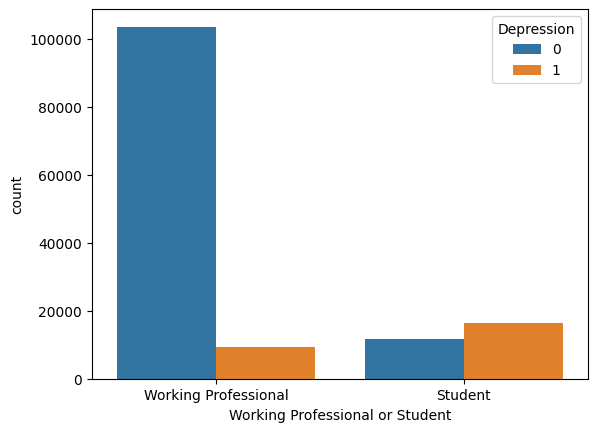

In [509]:
sns.countplot(data=df,x='Working Professional or Student',hue='Depression')

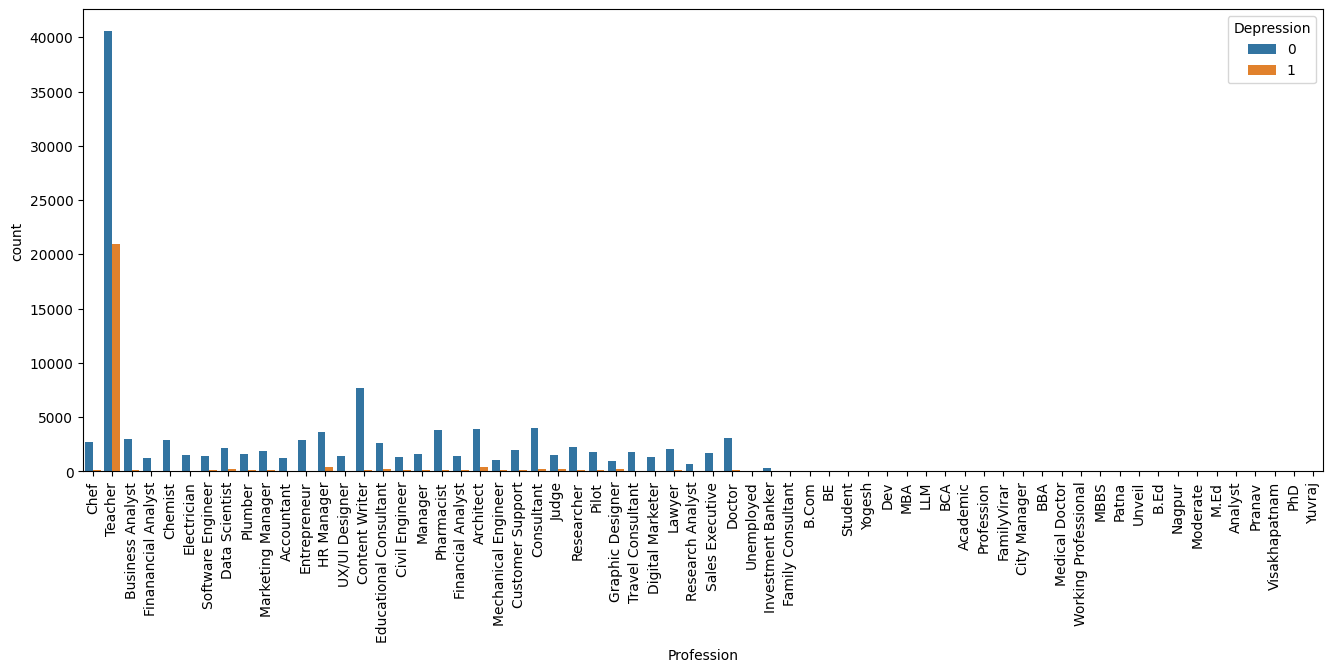

In [511]:
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='Profession',hue='Depression')
plt.xticks(rotation=90);

In [518]:
df['Profession'].value_counts()[df['Profession'].value_counts()<100].sort_values(ascending=False)

Profession
Student                 7
Academic                5
Profession              3
Yogesh                  3
BCA                     3
Unemployed              3
LLM                     2
PhD                     2
MBA                     2
Medical Doctor          1
MBBS                    1
Working Professional    1
B.Com                   1
BBA                     1
City Manager            1
FamilyVirar             1
Unveil                  1
Patna                   1
Analyst                 1
B.Ed                    1
Nagpur                  1
Moderate                1
M.Ed                    1
Pranav                  1
Visakhapatnam           1
Family Consultant       1
BE                      1
Dev                     1
Yuvraj                  1
Name: count, dtype: int64

In [521]:
prof = df['Profession'].value_counts()[df['Profession'].value_counts()>100].index.to_list()
df['Profession'] = df['Profession'].apply(lambda x: x if x in prof else 'missing')

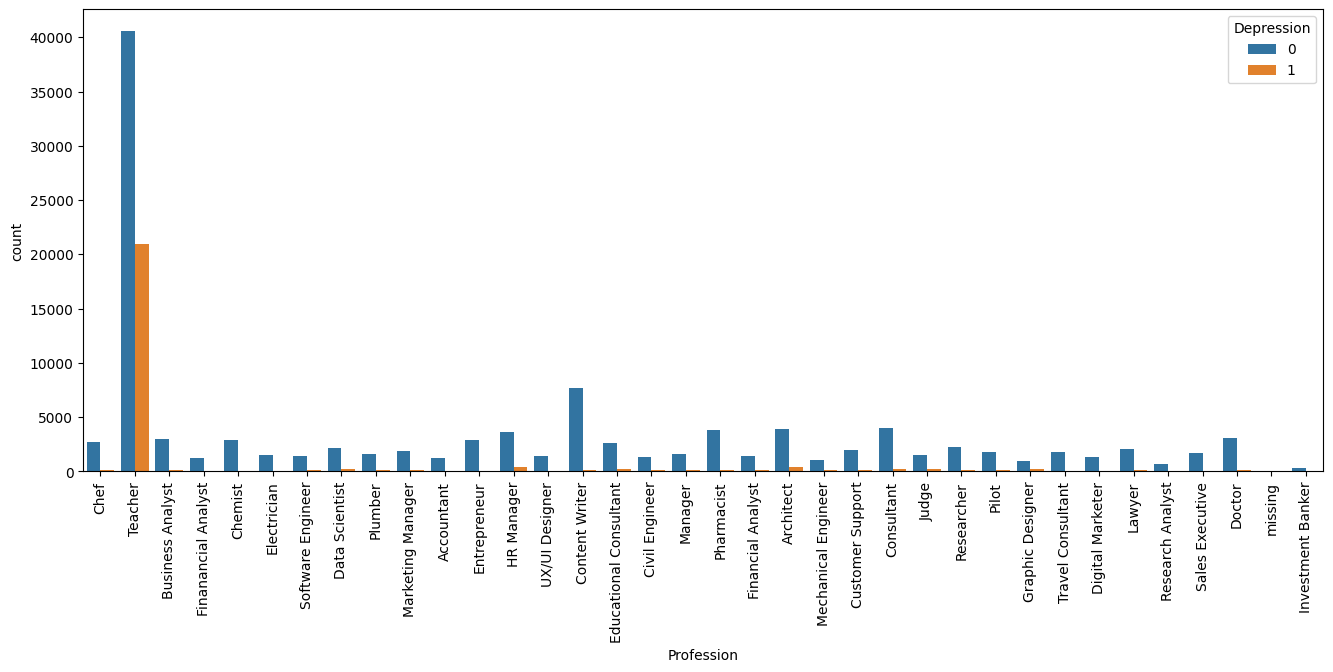

In [522]:
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='Profession',hue='Depression')
plt.xticks(rotation=90);

<Axes: xlabel='Work Pressure', ylabel='count'>

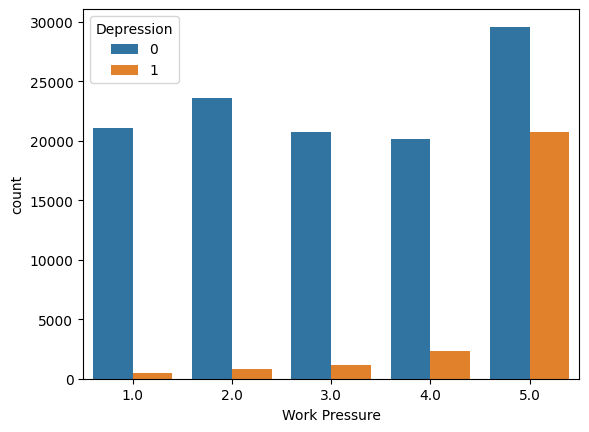

In [524]:
sns.countplot(data=df,x='Work Pressure',hue='Depression')

<Axes: xlabel='Job Satisfaction', ylabel='count'>

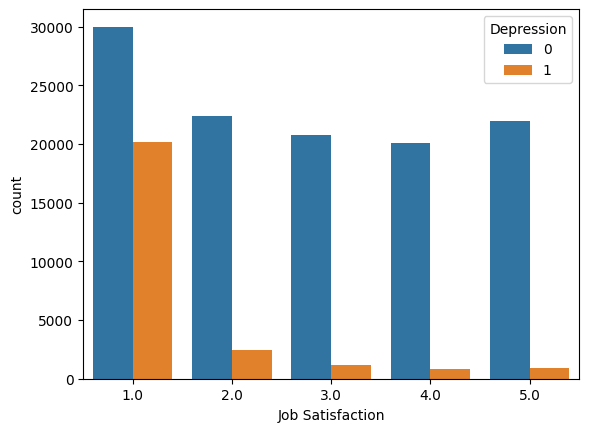

In [525]:
sns.countplot(data=df,x='Job Satisfaction',hue='Depression')

<Axes: >

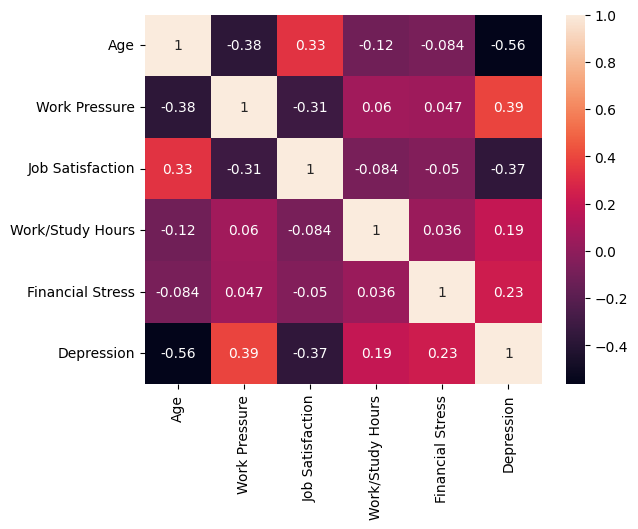

In [455]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

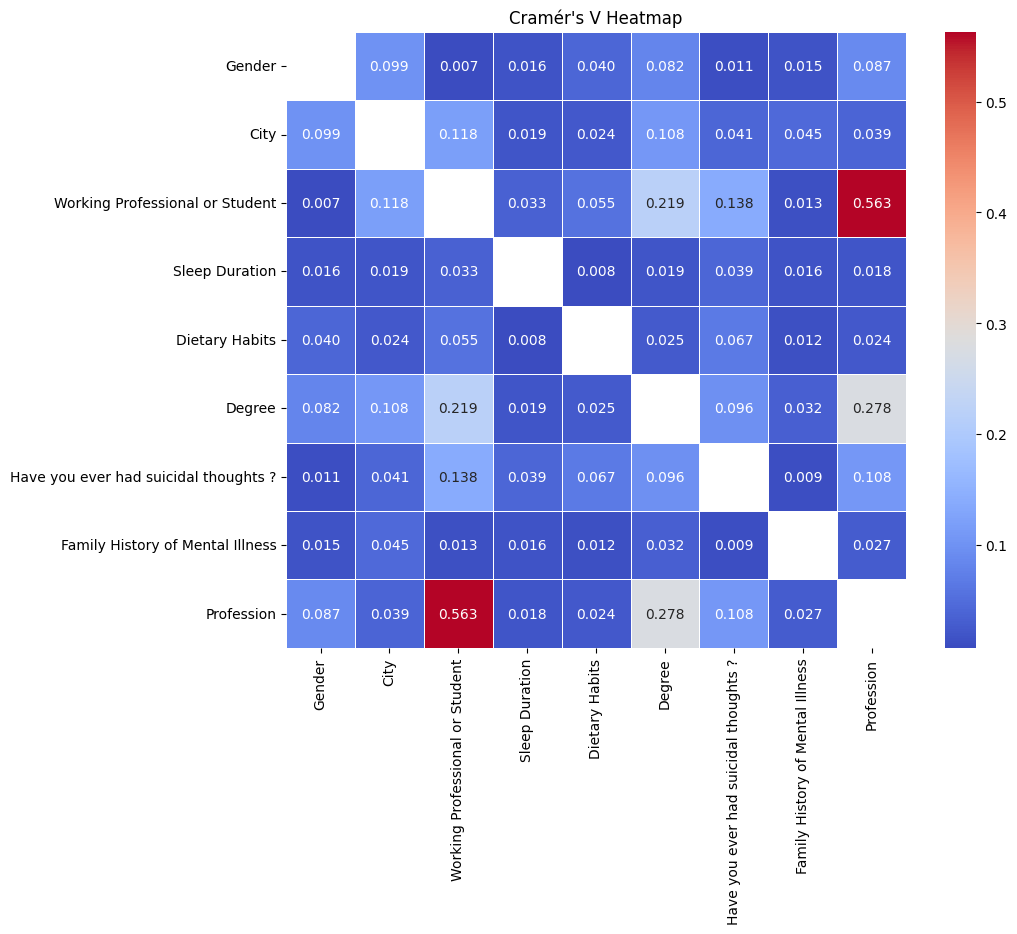

In [456]:
cat_col = df.select_dtypes(include='object').columns.to_list()
def cramers_v(chi2, n, table):
    r, c = table.shape
    return np.sqrt(chi2 / (n * (min(r, c) - 1)))

cramers_v_df = pd.DataFrame(index=cat_col, columns=cat_col)
for col1 in cat_col:
    for col2 in cat_col:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            cramers_v_df.loc[col1, col2] = cramers_v(chi2, df.shape[0], contingency_table)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_df.astype(float), annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Cramér's V Heatmap")
plt.show()
